In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as la

In [7]:
data = pd.read_csv('USArrests.csv')

In [8]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
x_features = ['Murder','Assault','UrbanPop','Rape']

# Preclase - Parte 1

In [10]:
#Normalizar
data[x_features] = (data[x_features]-data[x_features].mean())/data[x_features].std()

In [54]:
#Matriz de covarianza
cov_matrix = np.array(data[x_features].cov())
#Autovalores y autovectores
val, vec = la.eig(cov_matrix)

In [58]:
#Ordena vec y val de mayor a menor
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]

In [15]:
#Proyeccion de b sobre a 
def proy(a,b):
    return np.dot(a,b)/np.sqrt(np.dot(a,a))
#Vectores, nuevo sistema coordenado
vec1 = vec[:,0]
vec2 = -vec[:,1]

In [17]:
#Nuevas coordenadas
new_c = []
labels = []
for index, rows in data.iterrows():
    fila = rows[x_features].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
    labels.append(rows['Unnamed: 0'])    

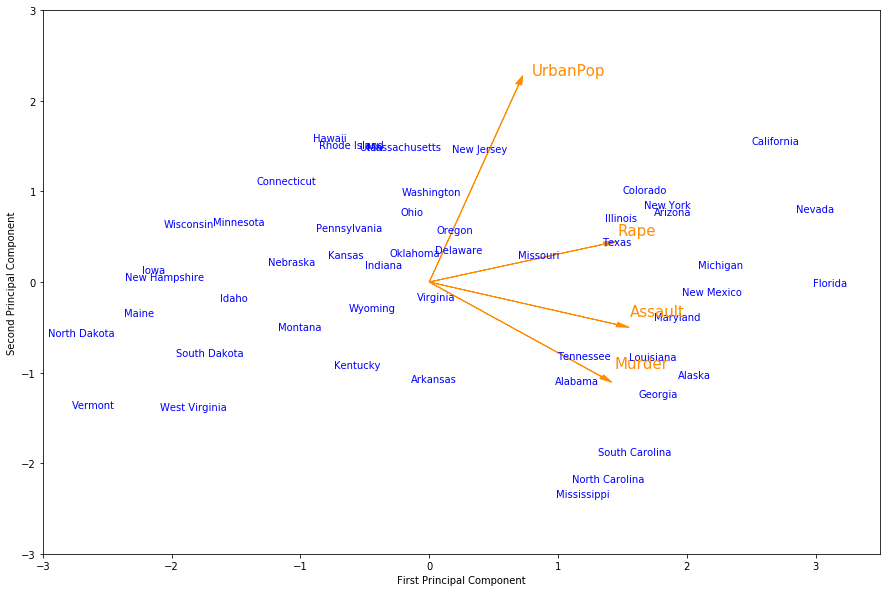

In [25]:
new_c = np.array(new_c)
#Grafica
fig = plt.figure(figsize = (15,10))
for i in range(len(labels)):
    plt.text(new_c[:,0][i],new_c[:,1][i],labels[i],fontsize = 10, color = 'blue')
plt.xlim(-3,3.5)
plt.ylim(-3,3)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

sf = 2.5

for i in range(len(vec1)):
    plt.arrow(0,0,vec1[i]*sf,vec2[i]*sf,ec = 'darkorange' ,fc = 'darkorange',head_width = 0.05, head_length = 0.1)
    plt.text(vec1[i]*sf+0.1,vec2[i]*sf+0.1,x_features[i],color='darkorange',fontsize = 15)

# Preclase - Parte 2

In [29]:
#Varianza
var = np.sum(data[x_features].var())

In [30]:
#Varianza por componente
def var_comp(vec,data,comp):
    return np.sum(data.dot(vec[:,comp])**2)/len(data)

In [59]:
var_comps = []
for i in range(4):
    var_comps.append(var_comp(vec,data[x_features],i)/var)

(0, 1.2)

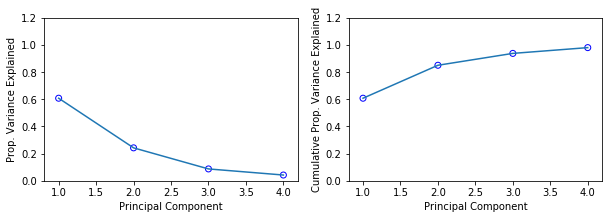

In [70]:
fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
x = [1,2,3,4]
plt.plot(x,var_comps)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.scatter(x,var_comps,facecolors="none",edgecolors='blue')
plt.ylim(0,1.2)

plt.subplot(1,2,2)
cum_var = np.cumsum(np.array(var_comps))
plt.plot(x,cum_var)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.scatter(x,cum_var,facecolors="none",edgecolors='blue')
plt.ylim(0,1.2)

# Parte 2

In [123]:
data = pd.read_csv('Cars93.csv')
data = data.dropna()

In [124]:
x_features = ['MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
              'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
              'Luggage.room', 'Weight']
data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [125]:
#Normalizar
data.Cylinders = data.Cylinders.astype(float)
data[x_features] = (data[x_features]-data[x_features].mean())/data[x_features].std()

In [126]:
#Matriz de covarianza
cov_matrix = np.array(data[x_features].cov())
#Autovalores y autovectores
val, vec = la.eig(cov_matrix)

In [127]:
#Ordena vec y val de mayor a menor
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]

In [128]:
#Varianza
var = np.sum(data[x_features].var())

In [129]:
#Varianza por componente
def var_comp(vec,data,comp):
    return np.sum(data.dot(vec[:,comp])**2)/len(data)

In [130]:
var_comps = []
for i in range(14):
    var_comps.append(var_comp(vec,data[x_features],i)/var)

(0, 1.2)

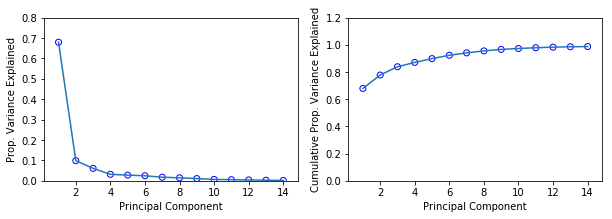

In [131]:
fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(x,var_comps)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.scatter(x,var_comps,facecolors="none",edgecolors='blue')
plt.ylim(0,0.8)

plt.subplot(1,2,2)
cum_var = np.cumsum(np.array(var_comps))
plt.plot(x,cum_var)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.scatter(x,cum_var,facecolors="none",edgecolors='blue')
plt.ylim(0,1.2)

## Teniendo en cuenta la varianza acumulada, los vectores que expresan el 80% de la varianza, son:

In [132]:
print('Vector1:')
print(vec[0])
print('Vector2:')
print(vec[1])
print('Vector3:')
print(vec[2])

Vector1:
[ 0.23541646  0.31276317 -0.15735991  0.75884764  0.22230196  0.11704734
 -0.06734543  0.05547428 -0.34323821 -0.06722456  0.16273358  0.06823225
 -0.12928933 -0.07231991]
Vector2:
[-0.28034652 -0.12091945  0.08084359  0.05575612  0.6182477  -0.084437
 -0.25419897 -0.11754108  0.39406006 -0.20217276  0.30253103 -0.31499249
 -0.19521161 -0.06585604]
Vector3:
[-3.09426009e-01  4.87688673e-04  1.04082152e-01  5.62823365e-02
  2.25199031e-01 -2.66011385e-02 -1.91960395e-01  4.55966517e-02
 -2.18580151e-01  4.46814573e-02 -3.71520771e-02  1.01303563e-01
  8.24110617e-01 -2.43576940e-01]


In [133]:
#Nuevas coordenadas
#Vectores, nuevo sistema coordenado
vec1 = vec[:,0]
vec2 = vec[:,1]
new_c = []
labels = []
for index, rows in data.iterrows():
    fila = rows[x_features].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
    labels.append(rows['Model'])  

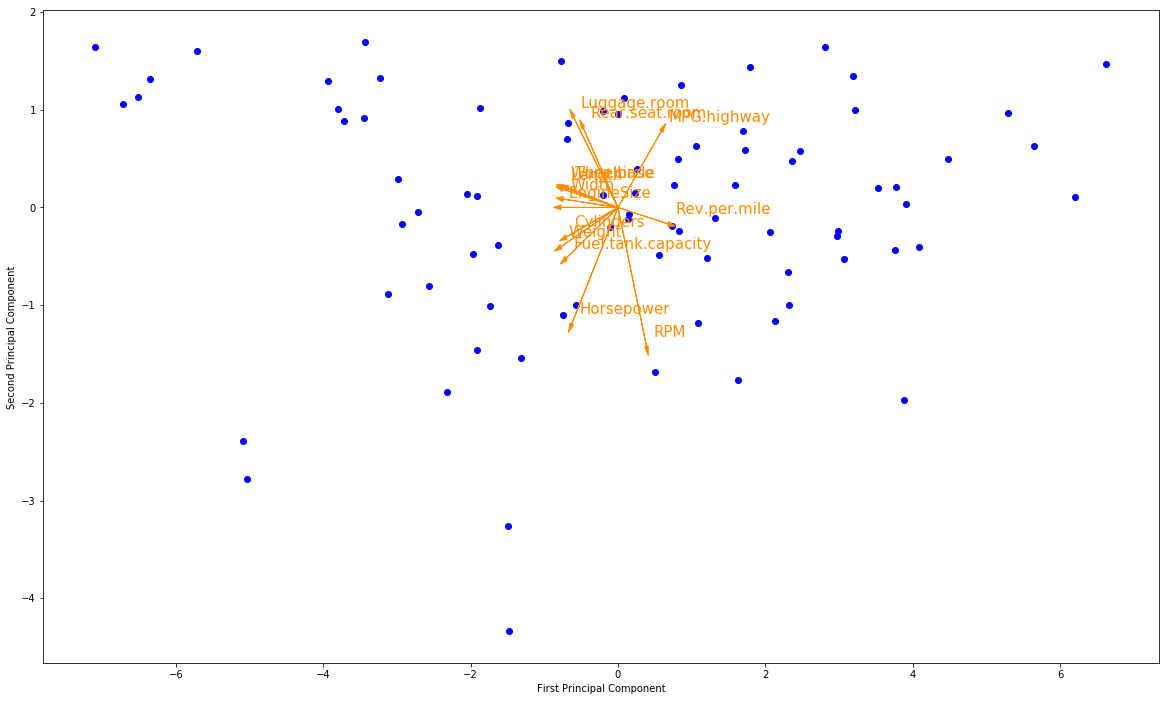

In [137]:
new_c = np.array(new_c)
#Grafica
fig = plt.figure(figsize = (20,12))
for i in range(len(labels)):
    plt.scatter(new_c[:,0][i],new_c[:,1][i], color = 'blue')


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

sf = 2.5

for i in range(len(vec1)):
    plt.arrow(0,0,vec1[i]*sf,vec2[i]*sf,ec = 'darkorange' ,fc = 'darkorange',head_width = 0.05, head_length = 0.1)
    plt.text(vec1[i]*sf+0.1,vec2[i]*sf+0.1,x_features[i],color='darkorange',fontsize = 15)